In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    df_copy = df.copy()
    probabilidad_descuento = 0.3
    descuento_threshold = df_copy['Precio'].quantile(probabilidad_descuento)
    df_copy['target'] = df_copy['Precio'] < descuento_threshold
    df_copy['Precio_descuento'] = df_copy['Precio'].where(
        ~df_copy['target'], df_copy['Precio'] * (1 - np.random.uniform(0.01, 0.01, size=len(df_copy)))
    )
    df_copy = pd.get_dummies(df_copy, columns=["Marca"], prefix="Marca")
    df_copy[["Ancho", "Alto", "Profundidad"]] = df_copy["Dimensiones"].str.replace(",", ".").str.extract(r"([\d.]+) x ([\d.]+) x ([\d.]+)").astype(float)
    df_copy.drop(columns=["Dimensiones", "Unnamed: 0", "Precio Inicial"], inplace=True)
    return df_copy

def train_with_early_stopping(df, max_trees=500, step=50, overfit_threshold=0.05, patience=3):
    X = df.drop(columns=["target", "Precio", "Precio_descuento"])
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    best_test_accuracy = 0
    no_improve_count = 0
    for n_estimators in range(step, max_trees + 1, step):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Trees: {n_estimators} | Train Acc: {train_accuracy:.4f} | Test Acc: {test_accuracy:.4f}")
        if train_accuracy - test_accuracy > overfit_threshold:
            print("⛔ Parando por sobreajuste: la diferencia entre train y test es muy alta")
            break
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            no_improve_count = 0
        else:
            no_improve_count += 1
        if no_improve_count >= patience:
            print("✅ Parando por estancamiento: la precisión en test no mejora")
            break
    return model

df = pd.read_csv('../Data/mobilsNET.csv')
df_processed = preprocess_data(df)
model = train_with_early_stopping(df_processed)

X = df_processed.drop(columns=["target", "Precio", "Precio_descuento"])
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances.head(10))

Trees: 50 | Train Acc: 0.8261 | Test Acc: 0.8077
Trees: 100 | Train Acc: 0.8277 | Test Acc: 0.8077
Trees: 150 | Train Acc: 0.8293 | Test Acc: 0.8077
Trees: 200 | Train Acc: 0.8285 | Test Acc: 0.8045
✅ Parando por estancamiento: la precisión en test no mejora
RAM              0.246942
Memoria          0.147082
Marca_samsung    0.097957
Profundidad      0.094642
Peso             0.091861
Estrellas        0.085732
Ancho            0.062111
Alto             0.051246
Marca_apple      0.039276
Marca_xiaomi     0.010039
dtype: float64


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    df_copy = df.copy()
    probabilidad_descuento = 0.3
    descuento_threshold = df_copy['Precio'].quantile(probabilidad_descuento)
    df_copy['target'] = df_copy['Precio'] < descuento_threshold
    df_copy['Precio_descuento'] = df_copy['Precio'].where(
        ~df_copy['target'], df_copy['Precio'] * (1 - np.random.uniform(0.01, 0.01, size=len(df_copy)))
    )
    df_copy = pd.get_dummies(df_copy, columns=["Marca"], prefix="Marca")
    df_copy[["Ancho", "Alto", "Profundidad"]] = df_copy["Dimensiones"].str.replace(",", ".").str.extract(r"([\d.]+) x ([\d.]+) x ([\d.]+)").astype(float)
    df_copy.drop(columns=["Dimensiones", "Unnamed: 0"], inplace=True)
    # df_copy.drop(columns=["Precio Inicial"], inplace=True)
    return df_copy

def train_with_early_stopping(df, max_trees=500, step=50, overfit_threshold=0.05, patience=3):
    X = df.drop(columns=["target", "Precio", "Precio_descuento"])
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    best_test_accuracy = 0
    no_improve_count = 0
    for n_estimators in range(step, max_trees + 1, step):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Trees: {n_estimators} | Train Acc: {train_accuracy:.4f} | Test Acc: {test_accuracy:.4f}")
        if train_accuracy - test_accuracy > overfit_threshold:
            print("⛔ Parando por sobreajuste: la diferencia entre train y test es muy alta")
            break
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            no_improve_count = 0
        else:
            no_improve_count += 1
        if no_improve_count >= patience:
            print("✅ Parando por estancamiento: la precisión en test no mejora")
            break
    return model

df = pd.read_csv('../Data/mobilsNET.csv')
df_processed = preprocess_data(df)
model = train_with_early_stopping(df_processed)

X = df_processed.drop(columns=["target", "Precio", "Precio_descuento"])
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances.head(10))

ValueError: could not convert string to float: '123,99'

Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 100.00%


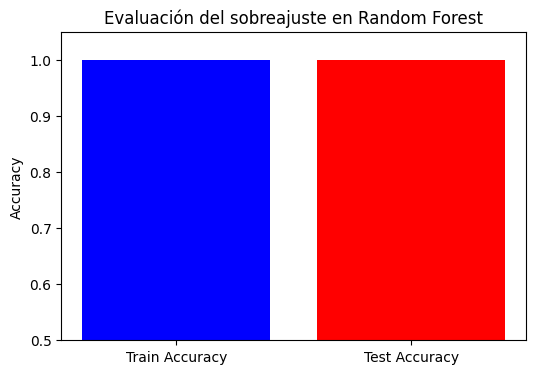

In [ ]:
import matplotlib.pyplot as plt

model, train_accuracy, test_accuracy, X_train, X_test, y_train, y_test = train_and_evaluate(df_processed)

# Graficar
plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylim(0.5, 1.05)
plt.ylabel("Accuracy")
plt.title("Evaluación del sobreajuste en Random Forest")
plt.show()